# Predicting House Prices

## Introduction

The Ames Housing dataset is a popular dataset on <a href = 'https://www.kaggle.com/datasets/prevek18/ames-housing-dataset'>kaggle</a> used to practice feature engineering.

In this project my goal is to select the best features from the dataset to predict house prices. To do this we are first going to create two classes `FeatureSelection` and `FeaturePrediction` to clean and compute the RMSE values of our dataset respectively.

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

## Creating The Classes

In [2]:
class FeatureSelection():
    """A class that cleans a pandas DataFrame and handles null values.
    
    Attributes
    ----------
    target : str
        Name of the target column.
               
    df : pandas.DataFrame
        The pandas DataFrame to be cleaned.
        
    Methods
    -------
    clean(size, drop)
        This method returns a cleaned pandas DataFrame with null values replaced by the mode.
        
    clean_numeric(size, drop)
        This method returns a cleaned pandas DataFrame with only numeric values and null values replaced by the mode.
        
    clean_object(size, drop):
        This method returns a  cleaned pandas DataFrame with only non-numeric values and null values replaced by the mode.
        
    train_test(df, size):
        This method returns a train and test pandas DataFrames of the specified size with their indexes shuffled.
    """
    
    target = 'SalePrice'
    def __init__(self, df):
        self.df = df
       
    
    def clean(self, size=1.0, drop=False):
        """ This method returns a cleaned pandas DataFrame with null values replaced by the mode.
        
        This method cleans null values by imputing NaN values with the modal value in the column.
        When the size argument is passed, columns with more than the specified proportion of null values will be dropped
        before the imputation is done. When the drop argument is passed, columns that are specified will be dropped from 
        the pandas DataFrame.
        
        Parameters
        ----------
        size : float, optional, default = 1.0
            The allowed proportion of null values for each column.
        
        drop : str, list, optional, default = False
            Name or list of columns to be dropped.
        
        Returns
        -------
        df : pandas.DataFrame
        
        Examples
        --------
        >>> df =  male female  age
                0  man  NaN     19
                1  boy  woman   NaN
                2  boy  girl    12
                3  NaN  woman   19
                4  NaN  woman   20
        
        >>> f = FeatureSelection(df)
        >>> clean_df = f.clean()
        >>> clean_df
                  male female  age
                0  man  woman   19
                1  boy  woman   19
                2  boy  girl    12
                3  boy  woman   19
                4  boy  woman   20        
        
        >>> clean_df = f.clean(size=0.2)
        >>> clean_df
                  female  age
                0  woman   19
                1  woman   19
                2  girl    12
                3  woman   19
                4  woman   20
        
        >>> clean_df = f.clean(drop = 'age')
        >>> clean_df
                   male female
                0  man  woman
                1  boy  woman
                2  boy  girl
                3  boy  woman
                4  boy  woman 
        """
        
        null_df = self.df.isnull().sum()
        df = self.df
        
        clean_df = df[null_df
                             [null_df <= int(size * len(df))].index
                            ]
        clean_df = clean_df.fillna(df.mode().loc[0])
        
        if drop:
            clean_df = clean_df.drop(drop, axis=1)
        else:
            clean_df
     
        return clean_df
    
        
    def clean_numeric(self, size=1.0, drop=False, how=None):
        """ This method returns a cleaned pandas DataFrame with only numeric values and null values replaced by the mode.
        
        This method selects columns in a pandas DataFrame with float or int dtypes and then cleans the columns by
        imputing NaN values with the modal value in the columns.
        When the size argument is passed, columns with more than the specified proportion of null values will be dropped
        before the imputation is done. When the drop argument is passed, columns that are specified will be dropped from 
        the pandas DataFrame. The how argument designates if null values is replaced either with the mean or median value
        and not the default modal value.
        
         Parameters
        ----------
        size : float, optional, default = 1.0
            The allowed proportion of null values for each column.
        
        drop : str, list, optional, default = False
            Name or list of columns to be dropped.
        
        how : str, optional, default = None
            Designates if NaN values is imputed with either, mode, mean or median.
        
        Returns
        -------
        num_df : pandas.DataFrame
        
        Examples
        --------
        >>> df =  male female  age  height weight
                   0  man  NaN     19   1.87   64
                   1  boy  woman   NaN  NaN    45
                   2  boy  girl    12   1.75   45
                   3  NaN  woman   19   1.75  Nan
                   4  NaN  woman   20   NaN    50
        
        >>> f = FeatureSelection(train)
        >>> num_df = f.clean_clean_numeric()
        >>> num_df
                   age  height weight
                0   19   1.87   64
                1   19   1.75   45
                2   12   1.75   45
                3   19   1.75   45
                4   20   1.75   50      
        
        >>> num_df = f.clean_numeric(size=0.2)
        >>> num_df
                   age  weight
                0   19   64
                1   19   45
                2   12   45
                3   19   45
                4   20   50
        
        >>> num_df = f.clean_numeric(drop = 'weight')
        >>> num_df
                   age  height 
                0   19   1.87  
                1   19   1.75  
                2   12   1.75  
                3   19   1.75  
                4   20   1.75  
                
        >>> num_df = f.clean_numeric(size=0.2, how = 'mean')
        >>> num_df
                   age   weight
                0   19     64
                1   14     45
                2   12.0   45
                3   19     40.8
                4   20     50
        
        """
        
        num_df = self.df.select_dtypes(include=['int', 'float']).copy()
        null_num_df = num_df.isnull().sum()
            
        num_df = num_df[null_num_df
                             [null_num_df <= int(size * len(num_df))].index
                            ]
        
        if how == 'mean':
            num_df = num_df.fillna(num_df.mean())
        elif how == 'median':
            num_df = num_df.fillna(num_df.median())
        else:
            num_df = num_df.fillna(num_df.mode().loc[0])
            
        if drop:
            num_df = num_df.drop(drop, axis=1)
        else:
            num_df
            
        return num_df
    
    
    def clean_object(self, size=1.0, drop=False):
        """ This method returns a cleaned pandas DataFrame with only non-numeric values and null values replaced by the mode.
        
        This method selects columns in a pandas DataFrame with object dtype and then cleans the columns by
        imputing NaN values with the modal value in the columns.
        When the size argument is passed, columns with more than the specified proportion of null values will be dropped
        before the imputation is done. When the drop argument is passed, columns that are specified will be dropped from 
        the pandas DataFrame.
        
         Parameters
         ----------
         size : float, optional, default = 1.0
            The allowed proportion of null values for each column.
        
         drop : str, list, optional, default = False
             Name or list of columns to be dropped
        
         Returns
         -------
         object_df : pandas.DataFrame
        
         Examples
         --------
         >>> df =   male female  age  height  pet 
                  0    man  NaN     19   1.87   cat
                  1    boy  woman   NaN  NaN    NaN
                  2    boy  girl    12   1.75   dog
                  3    NaN  woman   19   1.75   dog
                  4    NaN  woman   20   NaN    rabbit
        
         >>> f = FeatureSelection(train)
         >>> object_df = f.clean_object()
         >>> object_df
                      male female  pet 
                  0    man  woman  cat
                  1    boy  woman  dog
                  2    boy  girl   dog
                  3    boy  woman  dog 
                  4    boy  woman  rabbit     
        
         >>> object_df = f.clean_object(size=0.2)
         >>> object_df
                    female   pet 
                  0  woman   cat
                  1  woman   dog
                  2  girl    dog
                  3  woman   dog 
                  4  woman   rabbit 
        
         >>> object_df = f.clean_object(drop = 'pet')
         >>> object_df
                      male female  
                  0    man  woman  
                  1    boy  woman  
                  2    boy  girl   
                  3    boy  woman 
                  4    boy  woman   
        
         """
        
        price = self.df[self.target]
        object_df = self.df.select_dtypes(include=['object']).copy()
        object_df[self.target] = price
        null_object_df = object_df.isnull().sum()

        object_df = object_df[null_object_df
                                 [null_object_df <= int(size * len(object_df))].index
                                ]
        
        object_df = object_df.fillna(object_df.mode().loc[0])
        
        if drop:
            object_df = object_df.drop(drop, axis=1)
        else:
            object_df

        return object_df

    @staticmethod
    def train_test(df, size):
        """This method returns a train and test pandas DataFrames of the specified size with their indexes shuffled.
        
        The pandas DataFrame created from this method is first shuffled using `numpy.random.permuation` method
        before being split into the train and test pandas.DataFrame. The size argument determines how the
        pandas DataFrame is split, a size of 0.2 means 20% of the pandas DataFrame will be the test pandas DataFrame.
        
        Parameters
        ----------
        df : pandas.DataFrame
            The DataFrame to be split
            
        size : float
            The size assined to the test pandas DataFrame.
        
        Returns
        -------
        train : pandas.DataFrame
             A pandas DataFrame of 1.0 - size dimension.
             
        test : pandas.DataFrame
             A pandas DataFrame of size dimension.
        """
        from numpy.random import permutation, seed
        seed(1)
        rand_index = permutation(df.shape[0])
        df = df.reindex(rand_index)
        split = int(size * df.shape[0])
        train = df[split:].copy()
        test = df[:split].copy()
        
        return train, test
    
        
        
        

        

In [3]:
class FeaturePrediction():
    """ A class to compute predictions and root mean squared error(RMSE) values
    
    Attributes
    ----------
    train : pandas.DataFrame
         The training set pandas DataFrame.
    
    test : pandas.DataFrame
         The test set pandas DataFrame.
         
    predictors : list
          List of pandas DataFrame columns.
          
    target : str
          Name of pandas DataFrame column.
          
    Methods
    -------
    get_predictors()
    This method returns a train and test pandas DataFrame with specified predictors as columns.
    
    get_target()
    This method returns a pandas Series with the specified target.
    
    predict(model)
    This method returns predictions using a specified `scikit-learn` model.
    
    rmse(model)
    This method returns the root mean squared error(RMSE) of the model used.
    
    cross_validate(features, df, model, k)
    This method returns the mean root mean squared(RMSE) value of a given model for k number of folds.
    
    """
    
    def __init__(self, train, test, predictors, target):
        """Parameters
           ----------
           train : pandas.DataFrame
                The training set pandas DataFrame.
    
           test : pandas.DataFrame
                The test set pandas DataFrame.
         
          features : list
                List of pandas DataFrame columns.
          
          target : str
                Name of pandas DataFrame column.
        """
        
        self.train = train
        self.test = test
        self.predictors = predictors
        self.target = target
    
    def get_predictors(self):
        """This method returns a train and test pandas DataFrame with specified features as columns."""
        
        train_predictors = self.train[self.predictors]
        test_predictors = self.test[self.predictors]

        return train_predictors, test_predictors
    
    def get_target(self):
        """This method returns a pandas Series with the specified target."""
        
        train_target = self.train[self.target]
        test_target = self.test[self.target]

        return train_target, test_target
    
    def predict(self, model):
        """This method returns predictions using a specified `scikit-learn` model.
        
        This method uses a `scikit-learn` model and the features provided to make predictions of the target column.
        
        Parameters
        ----------
        model : scikit-learn class
             The specified model to be used.
             
        Returns
        -------
        predictions : numpy.ndarray
             Array of the predicted values of the target column.
        
        Examples
        --------
        >>> h = HouseFeatures(train, test, predictors, target)
        
        >>> model = LinearRegression()
        
        >>> p = h.predict(model)
        
        >>> print(p)
        
        array([125320.42873884, 242928.02269025, 166559.45518934, 
        ......   , 119320.04129234, 299768.05650165, 191979.27837178])
        
        """
        model.fit(self.get_predictors()[0], self.get_target()[0])
        predictions = model.predict(self.get_predictors()[1])
        
        return predictions
    
    def rmse(self, model):
        """This method returns the root mean squared error(RMSE) of the model used.
        
        This method uses `scikit-learn.metrics.mean_squared_error` to compute the mean squared error
        of a model and then returns the square root of the mean squared error(RMSE).
        
        Parameters
        ----------
        model : scikit-learn class
              The model used in making the predictions.
              
        Returns
        -------
        rmse : float
            The square root of the mean squared error
        
        Examples
        --------
        >>> h = HouseFeatures(train, test, predictors, target)
        
        >>> model = LinearRegression()
        
        >>> rmse = h.rmse(model)
        
        >>> print(rmse)
        
        57181.54869179068
        
        """
        
        from sklearn.metrics import mean_squared_error
        
        predictions = self.predict(model)
        error = mean_squared_error(self.get_target()[1], predictions)
        
        from numpy import sqrt
        rmse = sqrt(error)
        
        return rmse
    
    @staticmethod
    def cross_validate(features, df, model, k):
        ''' This method returns the mean root mean squared(RMSE) value of a given model for k number of folds.
    
        This method uses`scikit-learn.model_selection` KFold class to randomize and split the pandas DataFrame
        into k number of splits and then computes the average rmse of the splits using `scikit-learn.model_selction` 
        cross_val_score class.
    
        Parameters
        ----------
        features : tuple
           A tuple containing both the list of predictors and the target features.
           
        df : pandas.DataFrame
           The pandas DataFrame to be split.
        
        model : scikit-learn class
           The model used in making predictions.
        
        k : int
           number of splits.
    
        Returns
        -------
        avg_rmse : float
           average rmse value.
           
        Examples
        --------
        >>> h = HouseFeatures(train, test, predictors, target)
        
        >>> df = pandas.read_csv('data')
        
        >>> model = LinearRegression()
        
        >>> rmse = h.cross_validate(([predictors], target), df, lr, 5)
        
        >>> print(rmse)
        
        57181.54869179068
         
    '''
    
        predictors = features[0]
        target = features[1]
        
        from sklearn.model_selection import cross_val_score, KFold
        from numpy import sqrt, mean
        
        kf = KFold(k, shuffle=True, random_state = 1)
        model = model
        mses = cross_val_score(model, df[predictors],
                         df[target], scoring = 'neg_mean_squared_error',
                         cv = kf)
        
        rmses = sqrt(abs(mses))
        avg_rmse = mean(rmses)
        
        return avg_rmse
    
    
    
    
        

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
houses = pd.read_csv('AmesHousing.tsv', delimiter='\t')

In [6]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Data Cleaning
We already created the `FeatureSelection` class to do our data cleaning for us. So all we will have to do is parse our `train` DataFrame into the class and call on the class methods to clean it.

To clean our train DataFrame we are going to use the `FeatureSelection.clean()` method and pass in a size argument of 0.05, This will drop columns with more than 5% NaN values and then replace NaN values with the mode.

In [8]:
fs = FeatureSelection(houses)
clean_house = fs.clean(0.05)

In [9]:
clean_house

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,2.0,588.0,Y,120,0,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,2.0,484.0,Y,164,0,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,0.0,0.0,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,2.0,418.0,Y,240,38,0,0,0,0,0,4,2006,WD,Normal,170000


In [10]:
train, test = fs.train_test(clean_house, 0.5)
train

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1480,1481,907420080,60,RL,8199,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,WdShing,Wd Shng,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,648.0,Unf,0.0,80.0,728.0,GasA,Ex,Y,SBrkr,728,728,0,1456,1.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,410.0,Y,36,18,0,0,0,0,0,10,2008,WD,Normal,189000
2065,2066,905225020,60,RL,16779,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,2Story,5,4,1920,1996,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,356.0,TA,Fa,CBlock,Gd,TA,No,BLQ,267.0,Unf,0.0,404.0,671.0,GasA,Fa,Y,SBrkr,1567,1087,0,2654,0.0,0.0,3,0,4,1,TA,11,Mod,1,2.0,638.0,Y,128,570,0,0,0,0,500,5,2007,WD,Normal,158000
1548,1549,910203020,30,RM,6900,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,6,1940,1955,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,403.0,Rec,125.0,212.0,740.0,GasA,Ex,Y,SBrkr,778,0,0,778,0.0,0.0,1,0,2,1,TA,4,Typ,1,1.0,924.0,Y,0,25,0,0,0,0,0,2,2008,WD,Normal,120500
1872,1873,534177210,20,RL,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Hip,CompShg,HdBoard,HdBoard,BrkFace,320.0,TA,TA,CBlock,TA,TA,No,ALQ,916.0,Unf,0.0,326.0,1242.0,GasA,Fa,Y,SBrkr,1242,0,0,1242,0.0,0.0,1,1,3,1,TA,6,Typ,1,2.0,528.0,Y,0,0,0,0,0,0,0,9,2007,WD,Normal,175500
2301,2302,923275200,20,RL,8314,Pave,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1982,1982,Gable,CompShg,HdBoard,ImStucc,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,546.0,Unf,0.0,270.0,816.0,GasA,TA,Y,SBrkr,816,0,0,816,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,264.0,Y,168,0,0,0,0,0,0,6,2007,WD,Normal,124500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2764,906420020,60,RL,10041,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,789.0,Unf,0.0,119.0,908.0,GasA,Ex,Y,SBrkr,927,988,0,1915,1.0,0.0,2,1,3,1,Gd,8,Typ,1,2.0,506.0,Y,120,150,0,0,0,0,0,2,2006,WD,Abnorml,220000
905,906,909129090,50,RH,6300,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,4,1938,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,88.0,TA,TA,PConc,TA,Fa,No,LwQ,832.0,Unf,0.0,0.0,832.0,GasA,TA,Y,SBrkr,832,436,0,1268,0.0,0.0,1,1,3,1,TA,7,Typ,2,1.0,250.0,Y,0,0,55,0,0,0,0,7,2009,WD,Abnorml,160000
1096,1097,528292060,60,RL,12460,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,870.0,Unf,0.0,167.0,1037.0,GasA,Ex,Y,SBrkr,1037,1285,0,2322,0.0,0.0,2,1,4,1,TA,8,Typ,1,2.0,400.0,Y,144,44,0,0,0,0,0,5,2008,WD,Normal,225000
235,236,905426060,30,RL,10625,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108.0,Unf,0.0,350.0,458.0,GasA,Fa,N,SBrkr,835,0,0,835,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,366.0,Y,0,0,77,0,0,0,400,5,2010,COD,Abnorml,83000


## Univariate Feature
We are going to be training the model using only one predictor and then compute the rmse value for that predictor.

* Firstly we are going to train our model using only `Gr Liv Area` and then get the rmse value for that column.
* We are going to train the model using the top 10 most correlated columns with `SalePrice` and then compare their RMSE values.

In [11]:
feature_pred = FeaturePrediction(train, test, ['Gr Liv Area'], 'SalePrice')

In [12]:
lr = LinearRegression()

In [13]:
feature_pred.rmse(lr)

57181.54869179068

In [14]:
# to get the column names of the top 10 correlated columns with 'SalePrice'
top10 = abs(train.corr()['SalePrice']).sort_values(ascending=False).head(11).index.drop('SalePrice')

In [15]:
top10

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
       'Garage Area', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Mas Vnr Area'],
      dtype='object')

In [16]:
def top10_plot():
    y = []
    print('RMSE Values:')
    print('------------')

    for val in top10:
        rmse = FeaturePrediction(train, test, 
                          [val], 'SalePrice').rmse(lr)
        
        print(f'{val} - {rmse}')  
        y.append(rmse)

    plt.figure(figsize=(15, 10))
    x = np.arange(10)
    plt.xticks(x, top10)
    plt.ylim(45000, 72000)
    plt.plot(x, y, marker='o')
    plt.xlabel('Column Names')
    plt.ylabel('RMSE Values')
    plt.title('RMSE Values For The Top 10 Most Correlated Columns')
    plt.show()


RMSE Values:
------------
Overall Qual - 49121.38933026637
Gr Liv Area - 57181.54869179068
Garage Cars - 61948.656577031456
Total Bsmt SF - 63433.10180003701
Garage Area - 62435.72982174575
1st Flr SF - 63767.3311107095
Year Built - 67551.03376222038
Full Bath - 68722.66937321714
Year Remod/Add - 68974.89500494656
Mas Vnr Area - 70201.2137508766


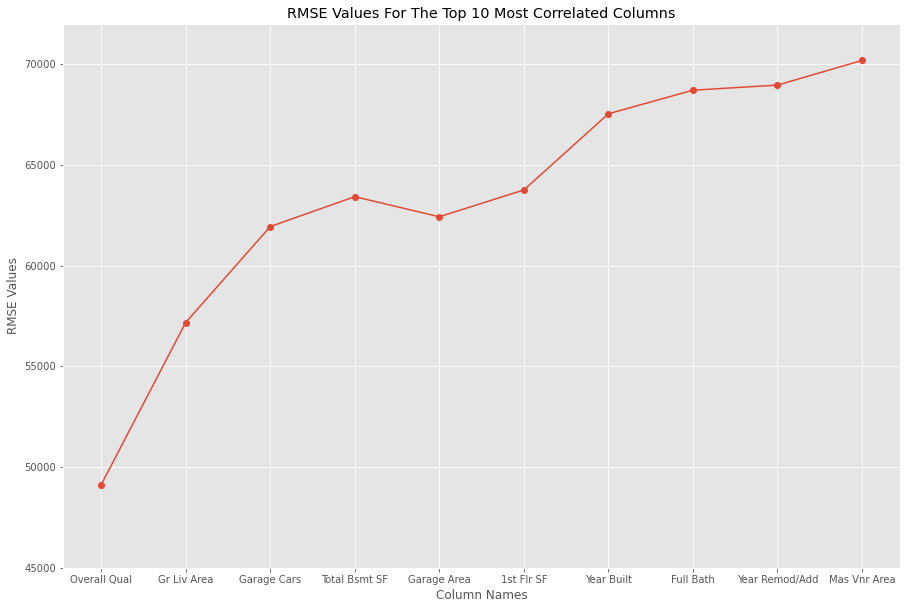

In [17]:
top10_plot()

We can see that in general, the RMSE values increased as we trained the model with columns that correlated less with `SalePrice`.

## Numeric Columns
Here we are going to train our model only using the numeric columns. Our `FeatureSelection` class has a method `clean_numeric()` whic returns a clean version of all the numeric columns. 

* When we call the `clean_numeric()` method, we are going to pass a size argument of 0.05. This will drop columns with more than 5% NaN values and then impute the remaining NaN values with the median.
* We are going to use the drop argument to remove the following coumns: `PID`, `Order`, `Mo Sold`, `Yr Sold`. The first two have no meaning and are not important to our prediction, while the other two can potentially leak information to our model.
* We are going to use seaborn.heatmap to visualise the correlation between the numeric columns and if there are columns that strongly correlate with each other, we are going to drop one of them.
* The remaining columns will be used to train the model and get the RMSE value.
* A cross validation test will be done to see how the model performs when split into different folds.


In [18]:
numeric_df = fs.clean_numeric(0.05, drop=['PID', 'Order', 'Mo Sold', 'Yr Sold'])
numeric_df

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,20,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000
1,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000
2,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000
3,20,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000
4,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,2.0,588.0,120,0,0,0,0,0,0,142500
2926,20,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0,131000
2927,85,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700,132000
2928,20,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,2.0,418.0,240,38,0,0,0,0,0,170000


In [19]:
num_train, num_test = fs.train_test(numeric_df, 0.5)
num_train

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
1480,60,8199,7,5,2005,2005,0.0,648.0,0.0,80.0,728.0,728,728,0,1456,1.0,0.0,2,1,3,1,7,1,2.0,410.0,36,18,0,0,0,0,0,189000
2065,60,16779,5,4,1920,1996,356.0,267.0,0.0,404.0,671.0,1567,1087,0,2654,0.0,0.0,3,0,4,1,11,1,2.0,638.0,128,570,0,0,0,0,500,158000
1548,30,6900,5,6,1940,1955,0.0,403.0,125.0,212.0,740.0,778,0,0,778,0.0,0.0,1,0,2,1,4,1,1.0,924.0,0,25,0,0,0,0,0,120500
1872,20,9600,7,6,1973,1973,320.0,916.0,0.0,326.0,1242.0,1242,0,0,1242,0.0,0.0,1,1,3,1,6,1,2.0,528.0,0,0,0,0,0,0,0,175500
2301,20,8314,5,7,1982,1982,0.0,546.0,0.0,270.0,816.0,816,0,0,816,0.0,0.0,1,0,2,1,5,0,1.0,264.0,168,0,0,0,0,0,0,124500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,60,10041,8,5,1992,1992,0.0,789.0,0.0,119.0,908.0,927,988,0,1915,1.0,0.0,2,1,3,1,8,1,2.0,506.0,120,150,0,0,0,0,0,220000
905,50,6300,5,4,1938,1950,88.0,832.0,0.0,0.0,832.0,832,436,0,1268,0.0,0.0,1,1,3,1,7,2,1.0,250.0,0,0,55,0,0,0,0,160000
1096,60,12460,7,5,1999,2000,0.0,870.0,0.0,167.0,1037.0,1037,1285,0,2322,0.0,0.0,2,1,4,1,8,1,2.0,400.0,144,44,0,0,0,0,0,225000
235,30,10625,5,5,1920,1950,0.0,108.0,0.0,350.0,458.0,835,0,0,835,0.0,0.0,1,0,2,1,5,0,1.0,366.0,0,0,77,0,0,0,400,83000


In [20]:
# checking for columns strongly correlated with 'SalePrice'
corr = abs(num_train.corr()['SalePrice'].sort_values(ascending=False))
corr

SalePrice          1.000000
Overall Qual       0.800167
Gr Liv Area        0.699607
Garage Cars        0.644925
Total Bsmt SF      0.636897
Garage Area        0.636285
1st Flr SF         0.619127
Year Built         0.555948
Full Bath          0.552862
Year Remod/Add     0.532262
Mas Vnr Area       0.492309
TotRms AbvGrd      0.487572
Fireplaces         0.484510
BsmtFin SF 1       0.459824
Wood Deck SF       0.362405
Open Porch SF      0.334121
Bsmt Full Bath     0.291887
Lot Area           0.267724
Half Bath          0.264483
2nd Flr SF         0.251515
Bsmt Unf SF        0.153473
Screen Porch       0.136829
Bedroom AbvGr      0.125529
Pool Area          0.040935
BsmtFin SF 2       0.026128
3Ssn Porch         0.024483
Misc Val           0.001831
Bsmt Half Bath     0.033603
Low Qual Fin SF    0.058239
MS SubClass        0.082362
Overall Cond       0.103209
Kitchen AbvGr      0.131407
Enclosed Porch     0.150017
Name: SalePrice, dtype: float64

In [21]:
# selecting columns strongly correlated with 'SalePrice' using a threshold of 0.3
strong_corr = corr[corr > 0.3].index

# returning a DataFrame with only columns strongly correlated with 'SalePrice'
num_subset = num_train[strong_corr]

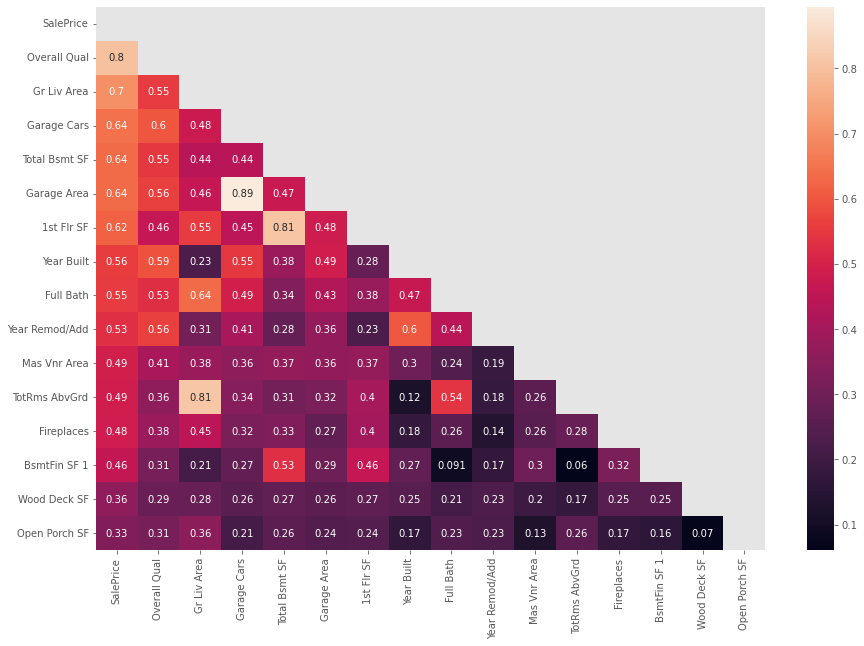

In [22]:
# plotting a heatmap of the strongly correlated columns
plt.figure(figsize=(15, 10))
mask = np.triu(
    np.ones_like(num_subset.corr())
)
sns.heatmap(num_subset.corr(), annot=True, mask=mask)
plt.show()

In [23]:
# removing the columns we no longer need from our list of columns
strong_corr = strong_corr.drop(['TotRms AbvGrd', 'Garage Cars', '1st Flr SF', 'SalePrice'])

In [24]:
# removing columns we no longer need from our numeric DataFrame
num_subset = num_subset.drop(['TotRms AbvGrd', 'Garage Cars', '1st Flr SF'], axis=1)

In [25]:
num_subset

,SalePrice,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Area,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,BsmtFin SF 1,Wood Deck SF,Open Porch SF
1480,189000,7,1456,728.0,410.0,2005,2,2005,0.0,1,648.0,36,18
2065,158000,5,2654,671.0,638.0,1920,3,1996,356.0,1,267.0,128,570
1548,120500,5,778,740.0,924.0,1940,1,1955,0.0,1,403.0,0,25
1872,175500,7,1242,1242.0,528.0,1973,1,1973,320.0,1,916.0,0,0
2301,124500,5,816,816.0,264.0,1982,1,1982,0.0,0,546.0,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,220000,8,1915,908.0,506.0,1992,2,1992,0.0,1,789.0,120,150
905,160000,5,1268,832.0,250.0,1938,1,1950,88.0,2,832.0,0,0
1096,225000,7,2322,1037.0,400.0,1999,2,2000,0.0,1,870.0,144,44
235,83000,5,835,458.0,366.0,1920,1,1950,0.0,0,108.0,0,0


In [26]:
num_pred = FeaturePrediction(num_subset, num_test, strong_corr, 'SalePrice')

In [27]:
num_pred.rmse(lr)

36311.688904062066

When we trained our model using the strongly correlated numerical columns, we got an RMSE value lower than that all of each of the top 10 most correlated columns. 

Now we are going to do a cross validation from 2 folds up to 7 folds to see how it affects the RMSE value.

34628.136069102526
34881.728713373224
34493.735003769165
34803.64844196663
34841.54763521283
34681.70751058123


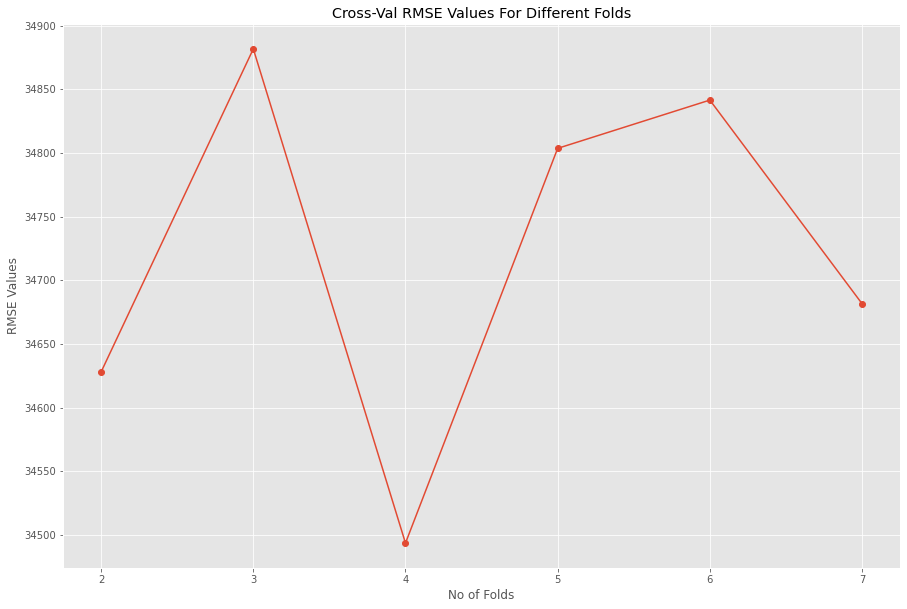

In [28]:
rmses = []
for i in range(2, 8):
    rmse = num_pred.cross_validate((strong_corr, 'SalePrice'),
                                   numeric_df, lr, i)
    print(rmse)
    rmses.append(rmse)

plt.figure(figsize=(15, 10))    
x = np.arange(2, 8)
plt.plot(x, rmses, marker='o')
plt.xlabel('No of Folds')
plt.ylabel('RMSE Values')
plt.title('Cross-Val RMSE Values For Different Folds')
plt.show()
    

## Categorical Columns
The `FeatureSelection` class has a `clean_object()` method that returns a DataFrame with object dtype only.
* We are goigng to select only columns that have more than 4 unique values to increase variability and less than 10 unique values so we don't end up with too many columns in our dummy DataFrame.
* We are going to cast the values in the selected columns as category dtype and then create a dummy DataFrame.
* We are going to train the model using only the dummy DataFrame to see how it performs.
* We are going to combine the dummy DataFrame with the previous numeric DataFrame and see how it performs.
* Lastly we are going to perform a cross validation test on the combined DataFrame.

In [29]:
object_df = fs.clean_object(0.05)
object_df

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,P,WD,Normal,215000
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal,105000
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,WD,Normal,172000
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Y,WD,Normal,244000
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal,142500
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal,131000
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal,132000
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal,170000


In [30]:
# checking the number of unique values in each column
print('Unique terms in each column')
print('----------------------------')
for item in object_df.columns.drop('SalePrice'):
    print(f'{item}: {len(object_df[item].unique())}')

Unique terms in each column
----------------------------
MS Zoning: 7
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Mas Vnr Type: 5
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Bsmt Qual: 5
Bsmt Cond: 5
Bsmt Exposure: 4
BsmtFin Type 1: 6
BsmtFin Type 2: 6
Heating: 6
Heating QC: 5
Central Air: 2
Electrical: 5
Kitchen Qual: 5
Functional: 8
Paved Drive: 3
Sale Type: 10
Sale Condition: 6


In [31]:
features = [column for column in  object_df.columns if len(object_df[column].unique())> 4
            and  len(object_df[column].unique()) < 10]

In [32]:
features

['MS Zoning',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Mas Vnr Type',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Sale Condition']

In [33]:
cat_df = object_df[features].copy()

# casting the required columns as category dtype
for feature in features:
    cat_df[feature] = cat_df[feature].astype('category')

    
for feature in features:
    dummy = pd.get_dummies(cat_df[feature])
    cat_df = pd.concat([cat_df, dummy], axis=1)
    cat_df.drop(feature, axis=1, inplace=True)

In [34]:
cat_df

,A (agr),C (all),FV,I (all),RH,RL,RM,Corner,CulDSac,FR2,FR3,Inside,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed,ClyTile,CompShg,...,Gd,Po,TA,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Floor,GasA,GasW,Grav,OthW,Wall,Ex,Fa,Gd,Po,TA,FuseA,FuseF,FuseP,Mix,SBrkr,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2926,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2927,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2928,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [35]:
cat_df['SalePrice'] = object_df['SalePrice']

In [36]:
cat_train, cat_test = fs.train_test(cat_df, 0.5)

In [37]:
cat_features = cat_train.columns.drop('SalePrice')

In [38]:
cat_pred = FeaturePrediction(cat_train, cat_test, cat_features, 'SalePrice')

In [39]:
cat_pred.rmse(lr)

6.859212764045961e+16

I noticed when I trained the model with just categorical features, it resulted in a really high rmse value.

In [40]:
combined_train = pd.concat([num_subset, cat_train.drop('SalePrice', axis=1)], axis=1)

In [41]:
combined_train

,SalePrice,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Area,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,BsmtFin SF 1,Wood Deck SF,Open Porch SF,A (agr),C (all),FV,I (all),RH,RL,RM,Corner,CulDSac,FR2,FR3,Inside,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,...,Gd,Po,TA,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Floor,GasA,GasW,Grav,OthW,Wall,Ex,Fa,Gd,Po,TA,FuseA,FuseF,FuseP,Mix,SBrkr,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,Abnorml,AdjLand,Alloca,Family,Normal,Partial
1480,189000,7,1456,728.0,410.0,2005,2,2005,0.0,1,648.0,36,18,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2065,158000,5,2654,671.0,638.0,1920,3,1996,356.0,1,267.0,128,570,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1548,120500,5,778,740.0,924.0,1940,1,1955,0.0,1,403.0,0,25,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1872,175500,7,1242,1242.0,528.0,1973,1,1973,320.0,1,916.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2301,124500,5,816,816.0,264.0,1982,1,1982,0.0,0,546.0,168,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,220000,8,1915,908.0,506.0,1992,2,1992,0.0,1,789.0,120,150,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
905,160000,5,1268,832.0,250.0,1938,1,1950,88.0,2,832.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1096,225000,7,2322,1037.0,400.0,1999,2,2000,0.0,1,870.0,144,44,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
235,83000,5,835,458.0,366.0,1920,1,1950,0.0,0,108.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [42]:
combined_test = pd.concat([num_test.drop('SalePrice', axis=1), cat_test], axis=1)

In [43]:
combined = pd.concat([numeric_df.drop('SalePrice', axis=1), cat_df], axis=1)

In [44]:
combined_features = combined_train.columns.drop('SalePrice')

In [45]:
combined_pred = FeaturePrediction(combined_train, combined_test, combined_features, 'SalePrice')

In [46]:
combined_pred.rmse(lr)

31877.76488473842

Training the model on both the numerical and categorical features resulted in a better rmse value than training it with either numerical features or categorical features alone.

31570.67986240048
31639.467358416543
30165.78569724781
30763.527033831604
30675.86221942467
30303.64915517245


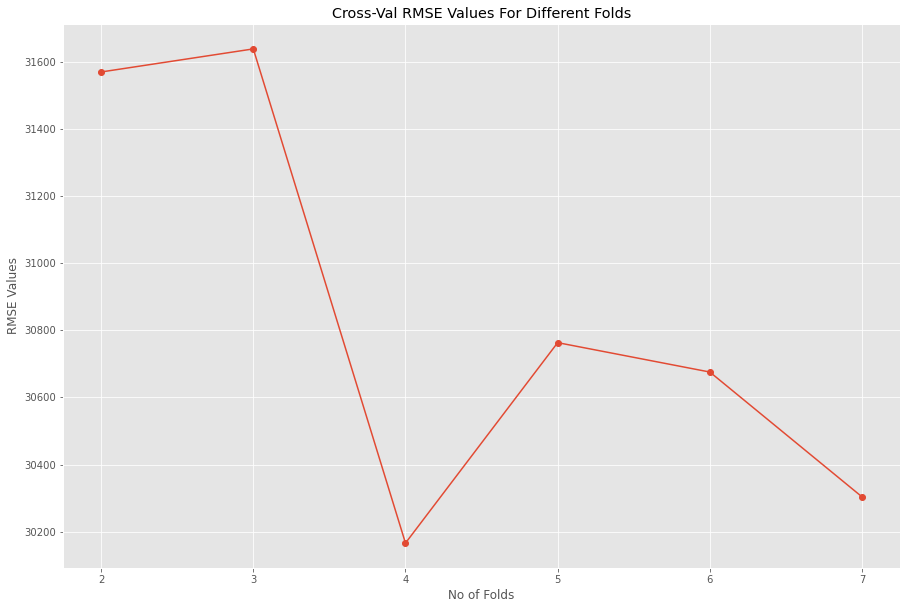

In [47]:
combined_rmses = []
for i in range(2, 8):
    rmse = combined_pred.cross_validate((combined_features, 'SalePrice'), combined, lr, i)
    print(rmse)
    combined_rmses.append(rmse)

plt.figure(figsize=(15, 10))    
x = np.arange(2, 8)
plt.plot(x, combined_rmses, marker='o')
plt.xlabel('No of Folds')
plt.ylabel('RMSE Values')
plt.title('Cross-Val RMSE Values For Different Folds')
plt.show()

## Conclusion
Training our model with the selected combined features resulted in lower RMSE values than training it with only features from the numerical columns only, the categorical columns only or just with one strongly correlated column to our dependent variable. 

This shows us that getting the best result from our model can be achieved by selecting the right features to train the model on.